In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
crime=pd.read_csv("C:\\Users\\prasa\\Downloads\\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Hierarchical Clustering

Normalization

In [27]:
def norm_func(i):
    x=(i-i.min()/(i.max()-i.min()))
    return(x)          #using min-max scaler

In [28]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


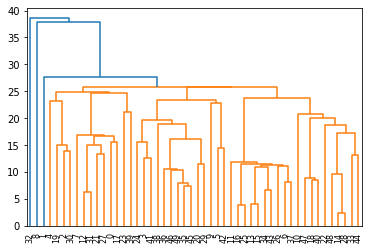

In [8]:
#Creating Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='single'))  # using single linkage

In [9]:
#Creating Clusters
HC=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

In [10]:
y_HC=HC.fit_predict(df_norm)
Clusters=pd.DataFrame(y_HC, columns=["clusters"])
Clusters

,clusters
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [11]:
crime['h_clusterid'] = HC.labels_
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


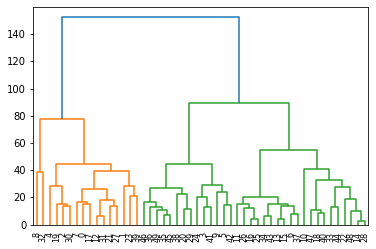

In [12]:
# trying average linkage method
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='average'))

In [13]:
HC=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  # taking 4 clusters

In [14]:
y_HC=HC.fit_predict(df_norm)
Clusters=pd.DataFrame(y_HC, columns=["clusters"])
Clusters

,clusters
0,1
1,1
2,1
3,2
4,1
5,2
6,0
7,1
8,3
9,2


# K-mean Clustering

In [15]:
#import k-mean package
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [16]:
crime1=pd.read_csv("C:\\Users\\prasa\\Downloads\\crime_data.csv")
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
# Normaization
def norm_func(i):
    x=(i-i.min()/(i.max()-i.min()))
    return(x)          #using min-max scaler

In [18]:
df_nm = norm_func(crime1.iloc[:,1:])
df_nm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


In [19]:
model=KMeans(n_clusters=4).fit(df_nm)
model.labels_   #getting labels of 4 clusters we created

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [29]:
crime1['clust']=model.labels_ # creating a  new column and assigning clusterid to it
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


# DB scan

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv("C:\\Users\\prasa\\Downloads\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [41]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [43]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [44]:
# Normalize data using standard scaler fit transform to dataset
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [48]:
#Create Clusters
dbscan = DBSCAN(eps=1, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=8)

In [49]:
dbscan.labels_  #noisy samples are labeled as -1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0],
      dtype=int64)

In [51]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [52]:
data['clusters']= dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
